In [1]:

import os
import random
import pandas as pd
import numpy as np
import cv2
from keras.utils import np_utils

In [2]:
IMAGE_SIZE = 100

In [3]:
Class=[]

for i in range(0,10) :
    Class.append(i)
    
for i in range(0,26):
    Class.append(chr(65+i))

In [4]:
Class

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [5]:
foldername_of_classes=[]
for i in range(1,37) :
    folderName = str(i)
    if len(folderName) == 1:
        folderName = '00'+folderName
    elif len(folderName) == 2:
        folderName = '0'+folderName
    folderName = 'Sample'+folderName
    foldername_of_classes.append(folderName)
    

foldername_of_classes    

['Sample001',
 'Sample002',
 'Sample003',
 'Sample004',
 'Sample005',
 'Sample006',
 'Sample007',
 'Sample008',
 'Sample009',
 'Sample010',
 'Sample011',
 'Sample012',
 'Sample013',
 'Sample014',
 'Sample015',
 'Sample016',
 'Sample017',
 'Sample018',
 'Sample019',
 'Sample020',
 'Sample021',
 'Sample022',
 'Sample023',
 'Sample024',
 'Sample025',
 'Sample026',
 'Sample027',
 'Sample028',
 'Sample029',
 'Sample030',
 'Sample031',
 'Sample032',
 'Sample033',
 'Sample034',
 'Sample035',
 'Sample036']

In [67]:
def create_data(dir_name) :
    data_set = []
    
    for i in range(1,37) :
        folderName = str(i)
        if len(folderName) == 1:
            folderName = '00'+folderName
        elif len(folderName) == 2:
            folderName = '0'+folderName
        folderName = 'Sample'+folderName
        
        cl_path = os.path.join(dir_name,folderName)
        class_num = foldername_of_classes.index(folderName)
        print(len(os.listdir(cl_path)))
        cnt=0
        for img in os.listdir(cl_path) :
            if cnt == 80:
                break
            try :
                img_array = cv2.imread(os.path.join(cl_path,img))
                img_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                gray_img  = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                data_set.append([gray_img, class_num])
                cnt = cnt+1
            except :
                pass
            
                    
        
    return data_set

In [8]:
data = create_data("Images")

105
79
70
50
47
64
64
48
32
34
558
115
215
191
446
79
143
193
302
77
92
215
149
363
382
159
35
389
342
312
92
84
67
80
67
55


In [ ]:
#Data Augmentation

In [33]:
'''
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
            rotation_range=5,
            fill_mode="nearest"
            )
'''

In [34]:
'''
for i in range(1,37) :
    folderName = str(i)
    if len(folderName) == 1:
        folderName = '00'+folderName
    elif len(folderName) == 2:
        folderName = '0'+folderName
    folderName = 'Sample'+folderName

    cl_path = os.path.join("Images",folderName)
    class_num = foldername_of_classes.index(folderName)
    numOfImages = len(os.listdir(cl_path))
    
    
    try:
        os.mkdir("AugmentedImages/"+folderName)
    except:
        pass
  
    for img in os.listdir(cl_path) :
        img = load_img(os.path.join(cl_path,img))
        x = img_to_array(img) 
        x = x.reshape((1,)+x.shape)
        if numOfImages<=40 :
            j=0
            for batch in datagen.flow(x,batch_size=1,
                                     save_to_dir="AugmentedImages/"+folderName,save_prefix = "img",save_format="jpeg") :
                j +=1
                if j>7:
                    break;
                    
        elif numOfImages>40 and  numOfImages<=60:
            j=0
            for batch in datagen.flow(x,batch_size=1,
                                     save_to_dir="AugmentedImages/"+folderName,save_prefix = "img",save_format="jpeg") :
                j +=1
                if j>5 :
                    break;
                    
        elif numOfImages>60 and  numOfImages<=100:
            j=0
            for batch in datagen.flow(x,batch_size=1,
                                     save_to_dir="AugmentedImages/"+folderName,save_prefix = "img",save_format="jpeg") :
                j +=1
                if j>3 :
                    break;
                    
        elif numOfImages>100 and  numOfImages<=200:
            j=0
            for batch in datagen.flow(x,batch_size=1,
                                     save_to_dir="AugmentedImages/"+folderName,save_prefix = "img",save_format="jpeg") :
                j +=1
                if j>1 :
                    break;
                    
        else:
            j=0
            for batch in datagen.flow(x,batch_size=1,
                                     save_to_dir="AugmentedImages/"+folderName,save_prefix = "img",save_format="jpeg") :
                j +=1
                if j>0 :
                    break;
        
        
'''      

In [68]:
data = create_data("AugmentedImages")

210
304
276
294
281
252
254
284
254
266
545
226
214
372
435
310
280
381
295
305
359
212
294
354
368
313
279
381
338
308
364
332
265
315
263
325


In [ ]:
#as we can see this is imbalanced dataset

In [69]:
random.shuffle(data)
print(len(data))

2880


In [70]:
X =[]
y=[]

for features,label in data:
    X.append(features)
    y.append(label)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=51)

In [72]:
np.array(X).shape

(2880, 100, 100)

In [73]:
X_train =np.array(X_train).reshape(-1,100,100,1)
X_test =np.array(X_test).reshape(-1,100,100,1)

In [74]:
X_train.shape

(2304, 100, 100, 1)

In [75]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [76]:
X_train =X_train/255.0
X_test = X_test/255.0

In [77]:
# max(y)

In [78]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 36)

y_test = np_utils.to_categorical(y_test, 36)

In [ ]:
y

### Apply CNN

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D ,Flatten

In [80]:
model = Sequential()

model.add(Conv2D(64 , (3,3) ,input_shape = X_train.shape[1:] ,activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(128 , (3,3) ,padding = "same", activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Conv2D(96 , (3,3) ,padding = "same", activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

model.add(Flatten())

model.add(Dense(activation='relu' , units =128 ))

model.add(Dense(36,activation = 'softmax'))

model.compile(loss="categorical_crossentropy" , optimizer= 'adam' ,metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 49, 49, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 96)        110688    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 96)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 13824)            

In [82]:
model_result = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs =15 ,batch_size=32)


Epoch 1/15
72/72 [==============================] - 49s 669ms/step - loss: 3.5847 - accuracy: 0.0249 - val_loss: 3.4004 - val_accuracy: 0.0868
Epoch 2/15
72/72 [==============================] - 56s 774ms/step - loss: 2.6842 - accuracy: 0.2962 - val_loss: 1.4236 - val_accuracy: 0.5799
Epoch 3/15
72/72 [==============================] - 86s 1s/step - loss: 0.8509 - accuracy: 0.7664 - val_loss: 0.9193 - val_accuracy: 0.7465
Epoch 4/15
72/72 [==============================] - 51s 708ms/step - loss: 0.3598 - accuracy: 0.9077 - val_loss: 0.8011 - val_accuracy: 0.7882
Epoch 5/15
72/72 [==============================] - 58s 809ms/step - loss: 0.1849 - accuracy: 0.9526 - val_loss: 0.9040 - val_accuracy: 0.7986
Epoch 6/15
72/72 [==============================] - 61s 842ms/step - loss: 0.1201 - accuracy: 0.9682 - val_loss: 1.0706 - val_accuracy: 0.7847
Epoch 7/15
72/72 [==============================] - 57s 786ms/step - loss: 0.1115 - accuracy: 0.9738 - val_loss: 0.8974 - val_accuracy: 0.8003
Ep

In [83]:
model.save("models/cnn_model.h5")

# testing

In [85]:
pic1_array = cv2.imread("Images/Sample001/img001-00001.png", cv2.IMREAD_GRAYSCALE)
new_array1 = cv2.resize(pic1_array,(100,100))
img1_batch = np.expand_dims(new_array1, axis=0)
uimg = np.resize(img1_batch,(1,100,100,1))

uimg = uimg/255.0
pred = model.predict(uimg)

pred


array([[7.5906169e-01, 6.3947926e-05, 9.7575025e-08, 4.9664795e-06,
        1.7733513e-11, 6.4884411e-08, 4.9431810e-09, 2.3941999e-12,
        2.6572714e-05, 2.4354836e-07, 1.9729494e-08, 1.4898778e-05,
        3.0918291e-02, 6.2765961e-04, 2.2973300e-06, 2.3986485e-11,
        1.5189493e-04, 9.0648274e-11, 2.3207544e-05, 1.9834258e-02,
        2.5376429e-10, 7.5045932e-07, 1.9254989e-10, 3.1380343e-09,
        1.8615183e-01, 6.7590736e-07, 1.3555838e-04, 3.3948819e-09,
        5.5296869e-08, 2.4778888e-07, 2.9805102e-03, 2.2555171e-09,
        1.1786431e-09, 1.2567366e-11, 2.0732496e-11, 5.8601632e-08]],
      dtype=float32)

In [87]:
a = pred[0].argmax()

In [88]:
Class[a]

0

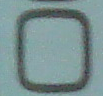

In [94]:
load_img("Images/Sample001/img001-00001.png")

In [90]:
pic2_array = cv2.imread("Images/Sample011/img011-00001.png", cv2.IMREAD_GRAYSCALE)
new_array2 = cv2.resize(pic2_array,(100,100))
img2_batch = np.expand_dims(new_array2, axis=0)
uimg2 = np.resize(img2_batch,(1,100,100,1))

uimg2 = uimg2/255.0
pred2 = model.predict(uimg2)

pred2


array([[4.7106782e-14, 2.2881477e-13, 3.6552750e-11, 1.1456986e-12,
        1.7748658e-11, 2.8339867e-20, 1.2888985e-15, 1.7679059e-26,
        3.4180598e-14, 2.6390696e-19, 1.0000000e+00, 5.3362363e-11,
        4.4107047e-17, 1.5444163e-16, 1.8701042e-18, 1.8255075e-19,
        9.2783217e-14, 1.7530466e-12, 2.7442722e-11, 1.1339447e-14,
        1.9604035e-20, 7.3119431e-16, 7.6736331e-19, 2.4724100e-15,
        1.3217130e-19, 1.4512933e-16, 2.3220896e-09, 1.5906330e-08,
        1.2704265e-16, 1.3012098e-22, 1.2907705e-19, 4.5451084e-26,
        4.8037529e-14, 2.9073173e-14, 5.9469161e-27, 1.8014732e-21]],
      dtype=float32)

In [92]:
Class[pred2[0].argmax()]

'A'

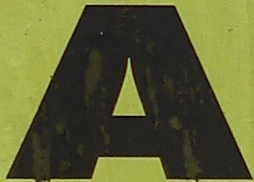

In [93]:
load_img("Images/Sample011/img011-00001.png")